# Classification algorithm applied to the lending club

In this analysis we will classify what features divide the good loans vs the defaulted loans using logistic regression and decision trees. 
All the data was taken from: [Here](https://www.kaggle.com/skihikingkevin/online-p2p-lending)

Our main task is to classify the the good loans and the defaulted loans. In order to accomplish this task we will be using a classification algorithm called Logistic regression.
With logistic regression we should have binary values, i.e. the target value should have only the good loans and the defaulted loans.

## Logistic Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Loans.csv")

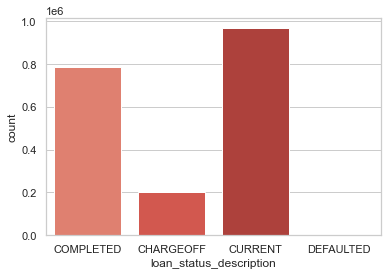

In [3]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="loan_status_description",data=data,palette="Reds_d")

Main changes to the dataset:
* We drop all the rows with loan status “CURRENT” given that this could be treated as a validation set
* We replace the rows with loan status “CHARGEOFF” as “DEFAULTED” given that those with charge off may be consider as posible defaulted loans

In [4]:
good = len(data[data['loan_status_description']=="COMPLETED"])
defaulted = len(data[data['loan_status_description']=="DEFAULTED"])+len(data[data['loan_status_description']=="CHARGEOFF"])
pct = good/(good+defaulted)
print("percentage of good loan is", pct*100)
pct = defaulted/(good+defaulted)
print("percentage of defaulted loan is", pct*100)

percentage of good loan is 79.43337602293961
percentage of defaulted loan is 20.566623977060377


In [4]:
data.drop(data[data['loan_status_description']=="CURRENT"].index, inplace=True)
data = data.replace(['CHARGEOFF'],'DEFAULTED')

With the changes said we got the next binary distribution for the loan status description columns
Percentage of good loans: 79.43%
Percentage of defaulted loans:20.57%

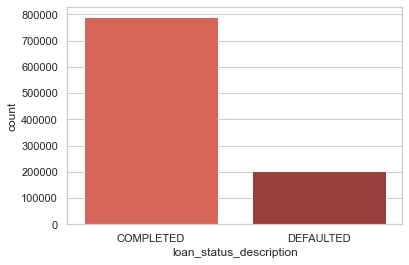

In [6]:
sns.countplot(x="loan_status_description",data=data,palette="Reds_d")
plt.savefig('1_13')

Text(0, 0.5, 'Loan Status vs Grade')

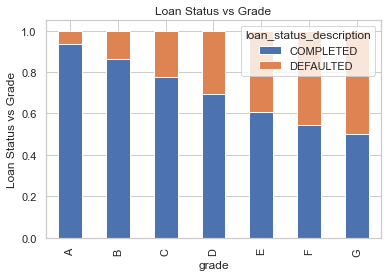

In [7]:
table=pd.crosstab(data.grade,data.loan_status_description)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status vs Grade')
plt.xlabel('grade')
plt.ylabel('Loan Status vs Grade')


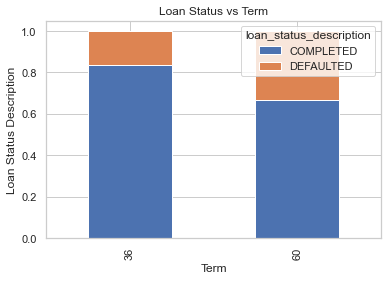

In [8]:
table=pd.crosstab(data.term,data.loan_status_description)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status vs Term')
plt.xlabel('Term')
plt.ylabel('Loan Status Description')
plt.savefig('Status vs Term')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993216 entries, 0 to 1961508
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   993216 non-null  int64  
 1   loan_number                  993216 non-null  int64  
 2   amount_borrowed              993216 non-null  float64
 3   term                         993216 non-null  int64  
 4   borrower_rate                993216 non-null  float64
 5   installment                  993216 non-null  float64
 6   grade                        993216 non-null  object 
 7   origination_date             993216 non-null  object 
 8   listing_title                993216 non-null  object 
 9   principal_balance            993216 non-null  float64
 10  principal_paid               993216 non-null  float64
 11  interest_paid                993216 non-null  float64
 12  late_fees_paid               993216 non-null  float64
 13

Next we made the following change to the grade columna for the classification algorithm.
Also, we take to account the columns that we said are key to differ from Good loans and defaulted loans.


In [5]:
data.replace({'grade' : { 'A' : 10, 'B' : 8, 'C' : 6, 'D' : 4,'E' : 2, 'F' : 1,'G' : 0}}, inplace=True)

In [6]:
X = data[['term', 'grade','principal_paid','amount_borrowed','interest_paid']]
y = data['loan_status_description']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

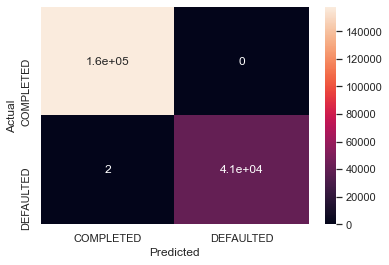

In [8]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

We get the following confusión matrix.
Which means that we got an accuracy of 99.99%. And a F1 score of 0.9999.
This obviously means that our data is biased, this is due to the proportion of completed loans and defaulted loans, so we need to apply another algorithm

## Decision trees

In [15]:
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9999899317371781


In [9]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average="binary", pos_label="COMPLETED")

0.9999936589665382

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = dt.predict(X_test)

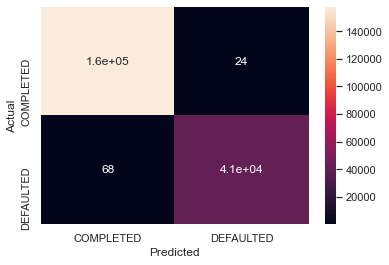

In [15]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

And we got for this classifier algorithm the following matrix confusion.
We got an accuracy of 99.95% and a F1 score of 0.9997.
Which tell us that the data is still biased.
I could compute the ROC curve but for computer limitations I couldn’t make this task as we can see on the Appendix 2


In [17]:
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9995368599101911


In [16]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average="binary", pos_label="COMPLETED")

0.9997083512972027

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores=cross_val_predict(logreg,X_train,y_train,cv=3,method="decision_function")

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(y_test,y_pred, pos_label="COMPLETED")
roc_auc = auc(fpr,tpr)
print("Area under the ROC curve: %f" % roc_auc)

fig, ax =plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'],color='red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
ax.set_xticklabels([])